In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')
    ax[0].title.set_text("Before")
    ax[1].title.set_text("After")


# Task 1: Implement a function to perform convolution

In [3]:
def conv(img, kernel):

    output_size = 300
    k = kernel.shape[0]
    

    conv_img = np.zeros(shape=(output_size, output_size))
    
    # Iterate over the rows
    for i in range(output_size):
        # Iterate over the columns
        for j in range(output_size):
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            conv_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return conv_img

# Explain your code here:
# The image must be greyscaled first to make it a 1 channel array
# It first determine the size of the output to make a 300x300 image
# initialize the convolved image array
# iterate over the rows and columns
# Get the current 5x5 matrix
# Multiply it with our kernel and sum it up
# assign the result of the sum into out new image array


In [4]:
B = [[2, 4, 5, 4, 2], [4, 9, 12, 9, 4], [5, 12, 15, 12, 5], [4, 9, 12, 9, 4], [2, 4, 5, 4, 2]]
B = np.array(B)
B = B.reshape(5,5)
print(B)

[[ 2  4  5  4  2]
 [ 4  9 12  9  4]
 [ 5 12 15 12  5]
 [ 4  9 12  9  4]
 [ 2  4  5  4  2]]


In [5]:
B = B * 1/159
print(B)

[[0.01257862 0.02515723 0.03144654 0.02515723 0.01257862]
 [0.02515723 0.05660377 0.0754717  0.05660377 0.02515723]
 [0.03144654 0.0754717  0.09433962 0.0754717  0.03144654]
 [0.02515723 0.05660377 0.0754717  0.05660377 0.02515723]
 [0.01257862 0.02515723 0.03144654 0.02515723 0.01257862]]


Text(0.5, 1.0, 'Paddded Image')

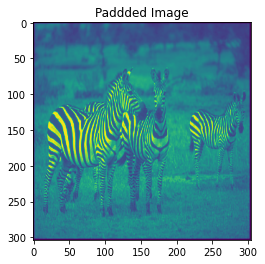

In [6]:
img = cv2.imread('./test04.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=(300, 300))
# Padding image
img = cv2.copyMakeBorder(img,2,2,2,2, cv2.BORDER_CONSTANT, None, value=0)
img = np.array(img)
plt.imshow(img)
plt.title("Paddded Image")

# Result

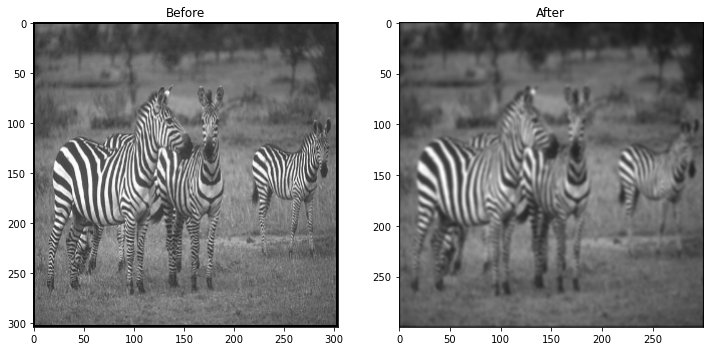

In [7]:
img_blurred = conv(img=np.array(img), kernel=B)
plot_two_images(img, img_blurred)

# Task 2: Calculate the image gradients


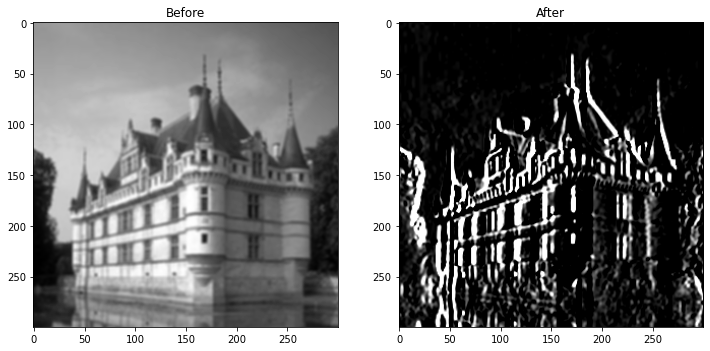

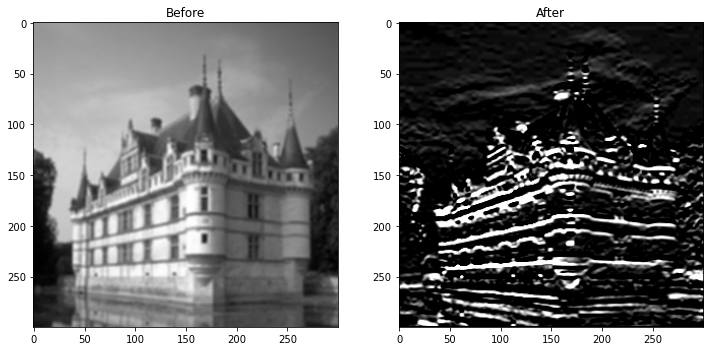

In [8]:
# Load the image
img2 = cv2.imread('./test05.jpg', cv2.IMREAD_GRAYSCALE)
# Blur the image
img2_blurred = conv(img=np.array(img2), kernel=B)
# Sobel Filter
sobelX = cv2.Sobel(src=img2_blurred, ddepth=cv2.CV_8U, dx=1, dy=0, ksize=-1) # Sobel Edge Detection on the X axis
sobelY = cv2.Sobel(src=img2_blurred, ddepth=cv2.CV_8U, dx=0, dy=1, ksize=-1) # Sobel Edge Detection on the Y axis
plot_two_images(img2_blurred, sobelX) 
plot_two_images(img2_blurred, sobelY)
# Demonstrate your understanding by answering the question below:
# Looking at the filter coefficients, explain how a sobel filter picks out horizontal edges?

# It calculates the gradient of an image intensity at each pixel and the kernel used 
# kind of sweep through the image horizontally 
# and finds the largest increase or decrease in intensity value

# Task 3: Calculate gradient magnitude

Text(0.5, 1.0, 'Gradient Magnitude')

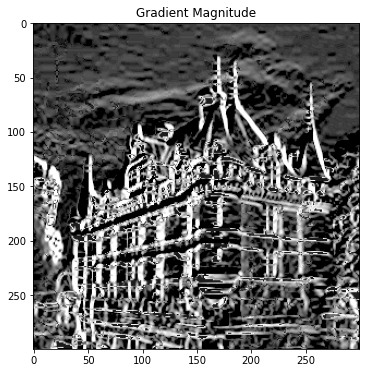

In [9]:
# Show results here
grad_mag = np.sqrt(sobelX^2 + sobelY^2)
figure(figsize=(12, 6))
plt.imshow(grad_mag,cmap='gray')
plt.title("Gradient Magnitude")
# Demonstrate your understanding by answering the question below:
# What differences in gradient magnitude would be observed for a corner, edge and solid region?

# Our model measure the change in intensity horizontally for sobelx and vertically for 'sobely'. 
# The gradient magnitude for an edge, the gradient magnitude or the eigen values for sobelx will be one small 
# eigen value in vertical direction and one large eigen value in horizontal direction while for sobely 
# it's the other way around.
# For a corner, it will show a large eigen values in any direction since the change in intensity is in both direction
# Lastly, for a solid region it will show a small eigen value in any direction since there is no change in intensity 
# at any direction


# Task 4: Calculate gradient orientation

/Users/antoniofernandochristophorus/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/antoniofernandochristophorus/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


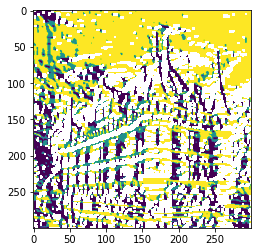

In [10]:
# Show results here
grad_orient = np.zeros(sobelX.shape)
grad_orient = sobelY/sobelX
grad_orient = np.arctan(grad_orient)
grad_orient = np.round(grad_orient/(np.pi/4))*np.pi/4
# Demonstrate your understanding by answering the question below:
# How could the gradient orientation be used to obtain rotational invariance for patch matching?
plt.imshow(grad_orient)


# Task 5: Extend your code to perform non-maximal suppression

In [6]:
# Explain your code here:
#
#
#

# Show results here


# Demonstrate your understanding by answering the question below:
# Explain how you chose the threshold for non-maximal suppression?
